<a href="https://colab.research.google.com/github/Zhiyi-Dong-6/SpiralData/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from torch.autograd import Variable

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
import torchvision.transforms as tfs
import torchvision.models as models

import time
import numpy as np


In [14]:
def gen_rotate_points(theta, radius, angle):
  x = np.cos(theta)*radius*np.cos(angle)-np.sin(theta)*radius*np.sin(angle)
  y = np.cos(theta)*radius*np.sin(angle)+np.sin(theta)*radius*np.cos(angle)
  return np.array([x, y]).T

def gen_two_classes(size):
  theta = np.sqrt(np.random.rand(size)) * 2 * np.pi
  radius = 4*theta
  
  angle_0 = np.pi * 0
  angle_1 = np.pi * 1


  points_0 = gen_rotate_points(theta, radius, angle_0)
  points_0 = points_0 + np.random.randn(size,2) # add random noise

  points_1 = gen_rotate_points(theta, radius, angle_1)
  points_1 = points_1 + np.random.randn(size,2) # add random noise

  return points_0, points_1

def gen_three_classes(size):
  theta = np.sqrt(np.random.rand(size)) * 2 * np.pi
  radius = 4*theta
  
  angle_0 = np.pi * (2/3)
  angle_1 = np.pi * (4/3)
  angle_2 = np.pi * (6/3)


  points_0 = gen_rotate_points(theta, radius, angle_0)
  points_0 = points_0 + np.random.randn(size,2) # add random noise

  points_1 = gen_rotate_points(theta, radius, angle_1)
  points_1 = points_1 + np.random.randn(size,2) # add random noise

  points_2 = gen_rotate_points(theta, radius, angle_2)
  points_2 = points_2 + np.random.randn(size,2) # add random noise

  return points_0, points_1, points_2

def gen_four_classes(size):
  theta = np.sqrt(np.random.rand(size)) * 2 * np.pi
  radius = 4*theta
  
  angle_0 = np.pi * 0
  angle_1 = np.pi * (1/2)
  angle_2 = np.pi * (2/2)
  angle_3 = np.pi * (3/2)


  points_0 = gen_rotate_points(theta, radius, angle_0)
  points_0 = points_0 + np.random.randn(size,2) # add random noise

  points_1 = gen_rotate_points(theta, radius, angle_1)
  points_1 = points_1 + np.random.randn(size,2) # add random noise

  points_2 = gen_rotate_points(theta, radius, angle_2)
  points_2 = points_2 + np.random.randn(size,2) # add random noise

  points_3 = gen_rotate_points(theta, radius, angle_3)
  points_3 = points_3 + np.random.randn(size,2) # add random noise

  return points_0, points_1, points_2, points_3


In [24]:
# Hyper Parameters
Epoch = 10
DATA_SIZE = 10000
Batch_size = 32
Lr = 0.0001

In [18]:
# 2-dim data
points_0, points_1 = gen_two_classes(int(DATA_SIZE/2)) 

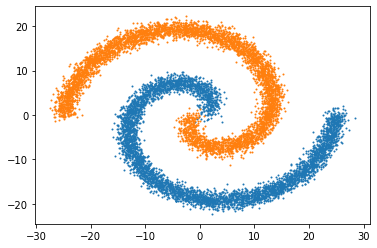

In [17]:
import matplotlib.pyplot as plt
# testing the method generating two-class points
plt.scatter(points_0[:,0],points_0[:,1], s = 1)
plt.scatter(points_1[:,0],points_1[:,1], s = 1)
plt.show()

In [19]:
data = torch.tensor(np.vstack((points_0,points_1))).float()
label = []
for i in range(DATA_SIZE):
  if i < DATA_SIZE/2:
    label.append(0)
  else:
    label.append(1)

In [20]:
data.shape, len(label)

(torch.Size([10000, 2]), 10000)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(data, label, test_size=0.3, random_state=42)

In [11]:
X_train.shape, X_test.shape, len(y_train), len(y_test)

(torch.Size([7000, 2]), torch.Size([3000, 2]), 7000, 3000)

In [22]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(2,3)
    )
    self.decoder = nn.Sequential(
        nn.Linear(3,2)
    )
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded,decoded
print(AutoEncoder())

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=2, bias=True)
  )
)


In [25]:
model = AutoEncoder()

optimizer = torch.optim.Adam(model.parameters(), lr=Lr)
criterion = nn.MSELoss()
loss_hist = []
for epoch in range(Epoch):
  loss = 0
  for step, x in enumerate(X_train):
    encoded, decoded = model(x.float())
    loss_value = criterion(decoded, x.float()) # mean square error
    optimizer.zero_grad()       # clear gradients for this training step
    loss_value.backward()          # backpropagation, compute gradients
    optimizer.step()          # apply gradients

    loss+=loss_value.item()
  loss_hist.append(loss/(step+1))
  print("epoch=",epoch,"loss=",loss/(step+1))


epoch= 0 loss= 29.270375425262195
epoch= 1 loss= 0.05292225602603802
epoch= 2 loss= 1.1954267491369167e-07
epoch= 3 loss= 5.994359242134118e-06
epoch= 4 loss= 6.395651073596554e-06
epoch= 5 loss= 5.195402805485434e-06
epoch= 6 loss= 3.8024105070925446e-06
epoch= 7 loss= 4.926729541024935e-06
epoch= 8 loss= 6.429093139917056e-06
epoch= 9 loss= 6.170701313349911e-06


<function matplotlib.pyplot.show(*args, **kw)>

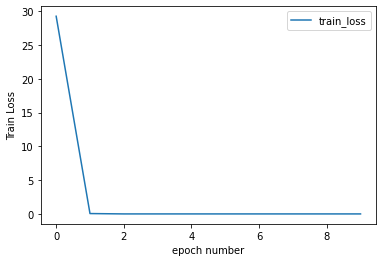

In [27]:
plt.plot(loss_hist, label='train_loss')
plt.xlabel("epoch number")
plt.ylabel("Train Loss")
plt.legend()
plt.show

In [28]:
points_0 = []
points_1 = []
for i, point in enumerate(data):
  newPoint, _ = model(point.float())
  if label[i] == 0:
    points_0.append(newPoint.tolist())
  if label[i] == 1:
    points_1.append(newPoint.tolist())
points_0 = np.array(points_0)
points_1 = np.array(points_1)

In [29]:
points_0.shape, points_1.shape

((5000, 3), (5000, 3))

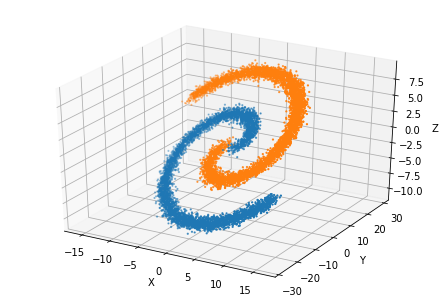

In [30]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax2 = Axes3D(fig)

ax2.scatter3D(points_0[:,0],points_0[:,1],points_0[:,2], cmap='Blues', s=1.5)  #绘制散点图
ax2.scatter3D(points_1[:,0],points_1[:,1],points_1[:,2], cmap='Red', s=1.5) 
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
plt.show()